### ECSE 415 Assignment 5
### Ehsan Ahmed 260880400

## Libraries Used

In [10]:
# Install NumPy version 1.23.5
!pip install numpy==1.23.5

# Install Matplotlib version 3.7.1
!pip install matplotlib==3.7.1

# Install OpenCV (cv2) version 4.8.0.76
!pip install opencv-contrib-python==4.8.0.76

# Install scikit-learn version 1.2.2
!pip install scikit-learn==1.2.2

# Install torch and torchvision and pytorch
!pip install torch==1.11.0+cpu torchvision==0.12.0+cpu -f https://download.pytorch.org/whl/torch_stable.html

# Install gluoncv
!pip install --upgrade gluoncv

!pip install mxnet

Looking in links: https://download.pytorch.org/whl/torch_stable.html
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.1/49.1 MB 10.3 MB/s eta 0:00:00
  Attempting uninstall: graphviz
    Found existing installation: graphviz 0.20.1
    Uninstalling graphviz-0.20.1:
      Successfully uninstalled graphviz-0.20.1


In [11]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

## Resources Used

In [ ]:
#The code is taken from tutorial 9
#To use Mask RCNN, I used the following website : https://cv.gluon.ai/build/examples_instance/demo_mask_rcnn.html

/content


## Get Images From Paths

In [12]:
# Get images from google drive -- note: remove these two lines if you are not using google colab
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

############ Must change the path variables below ######################
path='/content/drive/MyDrive/ECSE_415/assignment5/'  #path of directory

# Image names
img1Path = path + 'Person.png'
img2Path = path + 'landscape.png'
img3Path = path + 'street.png'
img4Path = path + 'Montreal_Street.jpg'

Mounted at /content/drive


## 1. K-Means and Mean-Shift Clustering for Segmentation


### 1.1 Compute the features of the Person.jpg and Landscape.png images by convolving the images with the two Haar filter kernels shown below: (a) Rectangle with size 24x12 pixels (b) Square with size 24x24 pixels. The white areas of the Haar filter kernel all have a weight of +1, while the black areas have a weight of -1. For the purposes of obtaining the convolution values for pixels near the border of the image, assume that the intensity values of pixels outside the borders of the image are 0. You could use the integral image technique to implement the Haar filtering in a more computationally efficient (i.e. faster) manner. Display the filtered feature images.

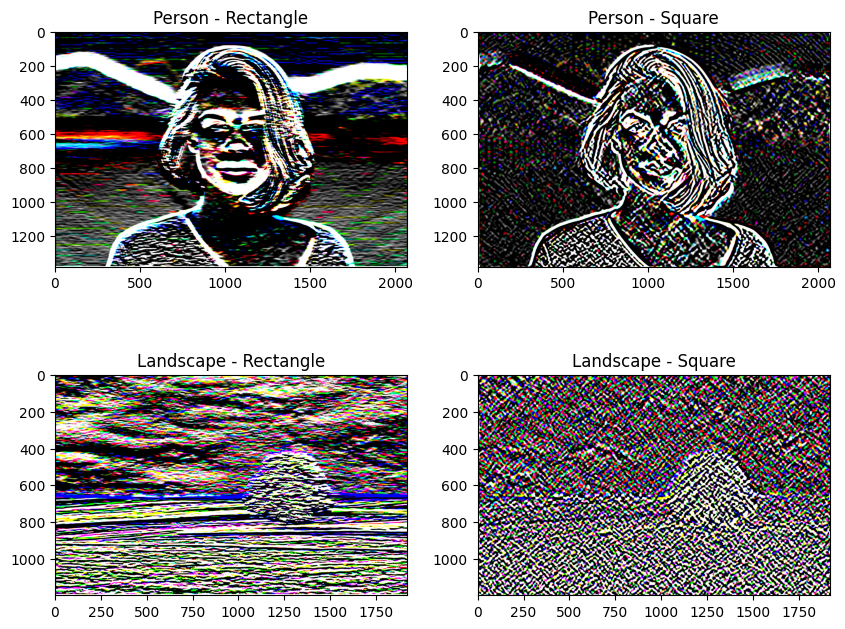

In [ ]:
# #Read Data images for training
# image1 = cv2.imread(img1Path)
# image2 = cv2.imread(img2Path)

# # Convert images from BGR to Gray
# person_image = cv2.cvtColor(image1, cv2.COLOR_BGR2GRAY)
# landscape_image = cv2.cvtColor(image2, cv2.COLOR_BGR2GRAY)


# # Create rectangle kernel filter
# kernel_rectangle = np.ones((12, 24), dtype=np.float64)
# kernel_rectangle[6:, :] = -1

# # Create square kernel filter
# kernel_square = np.ones((24, 24), dtype=np.float64)
# kernel_square[:12, :12] = -1
# kernel_square[12:, 12:] = -1

# # Perform convolution using Haar filters
# convolved_person_rectangle = cv2.filter2D(src = person_image, ddepth = -1, kernel = kernel_rectangle, borderType=cv2.BORDER_CONSTANT)
# convolved_person_square = cv2.filter2D(src = person_image, ddepth = -1, kernel = kernel_square, borderType=cv2.BORDER_CONSTANT)
# convolved_landscape_rectangle = cv2.filter2D(src = landscape_image, ddepth = -1, kernel = kernel_rectangle, borderType=cv2.BORDER_CONSTANT)
# convolved_landscape_square = cv2.filter2D(src = landscape_image, ddepth = -1, kernel = kernel_square, borderType=cv2.BORDER_CONSTANT)

# #Display the features
# plt.figure(figsize=(10, 8))

# plt.subplot(221)
# plt.imshow(convolved_person_rectangle, cmap='gray')
# plt.title("Person - Rectangle")

# plt.subplot(222)
# plt.imshow(convolved_person_square, cmap='gray')
# plt.title("Person - Square")

# plt.subplot(223)
# plt.imshow(convolved_landscape_rectangle, cmap='gray')
# plt.title("Landscape - Rectangle")

# plt.subplot(224)
# plt.imshow(convolved_landscape_square, cmap='gray')
# plt.title("Landscape - Square")

# plt.show()



# Read RGB images for training
image1 = cv2.imread(img1Path)
image2 = cv2.imread(img2Path)

# Convert images from BGR to RGB
image1_rgb = cv2.cvtColor(image1, cv2.COLOR_BGR2RGB)
image2_rgb = cv2.cvtColor(image2, cv2.COLOR_BGR2RGB)

# Create rectangle kernel filter
kernel_rectangle = np.ones((12, 24), dtype=np.float64)
kernel_rectangle[6:, :] = -1

# Create square kernel filter
kernel_square = np.ones((24, 24), dtype=np.float64)
kernel_square[:12, :12] = -1
kernel_square[12:, 12:] = -1

# Perform convolution on each channel separately
convolved_person_rectangle = np.zeros_like(image1_rgb, dtype=np.float64)
convolved_person_square = np.zeros_like(image1_rgb, dtype=np.float64)
convolved_landscape_rectangle = np.zeros_like(image2_rgb, dtype=np.float64)
convolved_landscape_square = np.zeros_like(image2_rgb, dtype=np.float64)

for i in range(3):  # Iterate over RGB channels
    convolved_person_rectangle[:, :, i] = cv2.filter2D(src=image1_rgb[:, :, i], ddepth=-1, kernel=kernel_rectangle, borderType=cv2.BORDER_CONSTANT)
    convolved_person_square[:, :, i] = cv2.filter2D(src=image1_rgb[:, :, i], ddepth=-1, kernel=kernel_square, borderType=cv2.BORDER_CONSTANT)
    convolved_landscape_rectangle[:, :, i] = cv2.filter2D(src=image2_rgb[:, :, i], ddepth=-1, kernel=kernel_rectangle, borderType=cv2.BORDER_CONSTANT)
    convolved_landscape_square[:, :, i] = cv2.filter2D(src=image2_rgb[:, :, i], ddepth=-1, kernel=kernel_square, borderType=cv2.BORDER_CONSTANT)


# Normalize the images to the range [0, 1]
convolved_person_rectangle_normalized = (convolved_person_rectangle - np.min(convolved_person_rectangle)) / (np.max(convolved_person_rectangle) - np.min(convolved_person_rectangle))
convolved_person_square_normalized = (convolved_person_square - np.min(convolved_person_square)) / (np.max(convolved_person_square) - np.min(convolved_person_square))
convolved_landscape_rectangle_normalized = (convolved_landscape_rectangle - np.min(convolved_landscape_rectangle)) / (np.max(convolved_landscape_rectangle) - np.min(convolved_landscape_rectangle))
convolved_landscape_square_normalized = (convolved_landscape_square - np.min(convolved_landscape_square)) / (np.max(convolved_landscape_square) - np.min(convolved_landscape_square))


# Display the features
plt.figure(figsize=(10, 8))

plt.subplot(221)
plt.imshow(convolved_person_rectangle_normalized)  # Sum across channels for visualization
plt.title("Person - Rectangle")

plt.subplot(222)
plt.imshow(convolved_person_square_normalized)  # Sum across channels for visualization
plt.title("Person - Square")

plt.subplot(223)
plt.imshow(convolved_landscape_rectangle_normalized)  # Sum across channels for visualization
plt.title("Landscape - Rectangle")

plt.subplot(224)
plt.imshow(convolved_landscape_square_normalized)  # Sum across channels for visualization
plt.title("Landscape - Square")

plt.show()

### 1.2 Implement the K-means clustering to compute the segmentation of the Person.jpg and the Landscape.png image with Haar features. Set K=3. Display the segmented images.

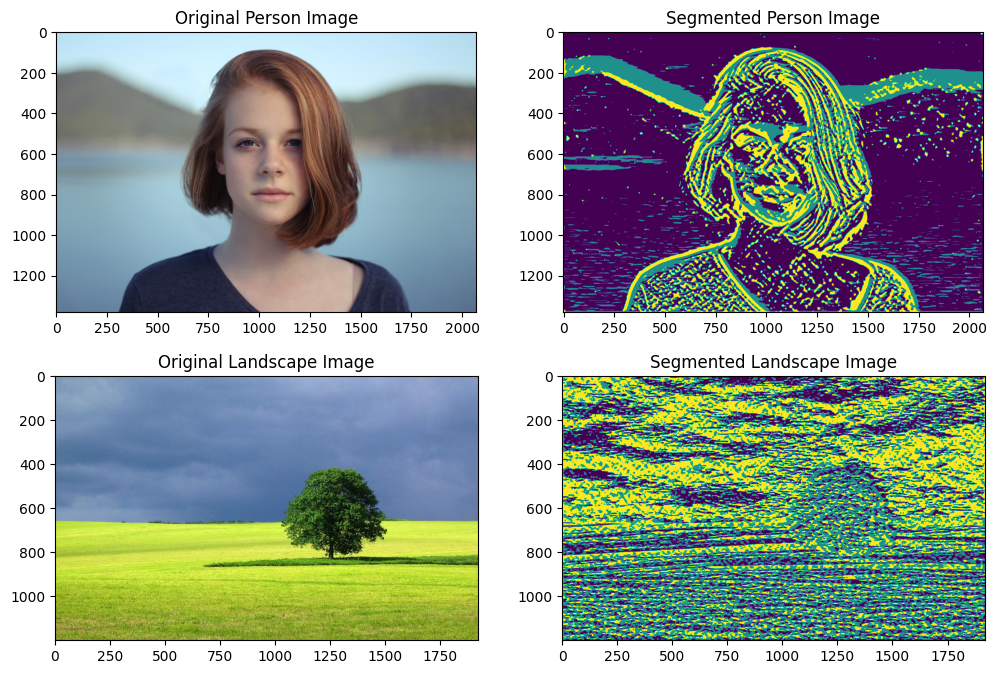

In [ ]:
# # Prepare feature vectors
# person_features = np.column_stack([convolved_person_rectangle.flatten(), convolved_person_square.flatten()])
# landscape_features = np.column_stack([convolved_landscape_rectangle.flatten(), convolved_landscape_square.flatten()])


# # Apply K-means clustering (K=3) to the feature vectors
# person_kmeans = KMeans(n_clusters=3, n_init=10, random_state=0)
# person_kmeans.fit(person_features)
# landscape_kmeans = KMeans(n_clusters=3, n_init=10, random_state=0)
# landscape_kmeans.fit(landscape_features)

# # Get labels and reshape it to image format
# person_segmented = person_kmeans.labels_.reshape(person_image.shape)
# landscape_segmented = landscape_kmeans.labels_.reshape(landscape_image.shape)

# # Display the segmented images
# plt.figure(figsize=(12, 6))

# plt.subplot(121)
# plt.imshow(person_segmented)
# plt.title("Segmented Person")

# plt.subplot(122)
# plt.imshow(landscape_segmented)
# plt.title("Segmented Landscape")

# plt.show()









# Reshape the data to have three columns (R, G, B)
person_data_rgb = np.concatenate([convolved_person_rectangle_normalized.reshape(-1, 3),
                                  convolved_person_square_normalized.reshape(-1, 3)], axis=1)
landscape_data_rgb = np.concatenate([convolved_landscape_rectangle_normalized.reshape(-1, 3),
                                  convolved_landscape_square_normalized.reshape(-1, 3)], axis=1)

kmeans_person = KMeans(n_clusters=3, n_init=10, random_state=0)
kmeans_landscape = KMeans(n_clusters=3, n_init=10, random_state=0)

person_labels = kmeans_person.fit_predict(person_data_rgb)
landscape_labels = kmeans_landscape.fit_predict(landscape_data_rgb)

person_segmented = person_labels.reshape(image1_rgb.shape[:2])
landscape_segmented = landscape_labels.reshape(image2_rgb.shape[:2])



# Display the original and segmented images
plt.figure(figsize=(12, 8))
plt.subplot(221)
plt.imshow(image1_rgb)
plt.title("Original Person Image")

plt.subplot(222)
plt.imshow(person_segmented)
plt.title("Segmented Person Image")

plt.subplot(223)
plt.imshow(image2_rgb)
plt.title("Original Landscape Image")

plt.subplot(224)
plt.imshow(landscape_segmented)
plt.title("Segmented Landscape Image")

plt.show()




### 1.3 Implement the Mean-shift clustering to compute the segmentation of the Person.jpg and Landscape.png images. Display the segmented images. You can use the scikit implementation of the mean shift method: sklearn meanshift.

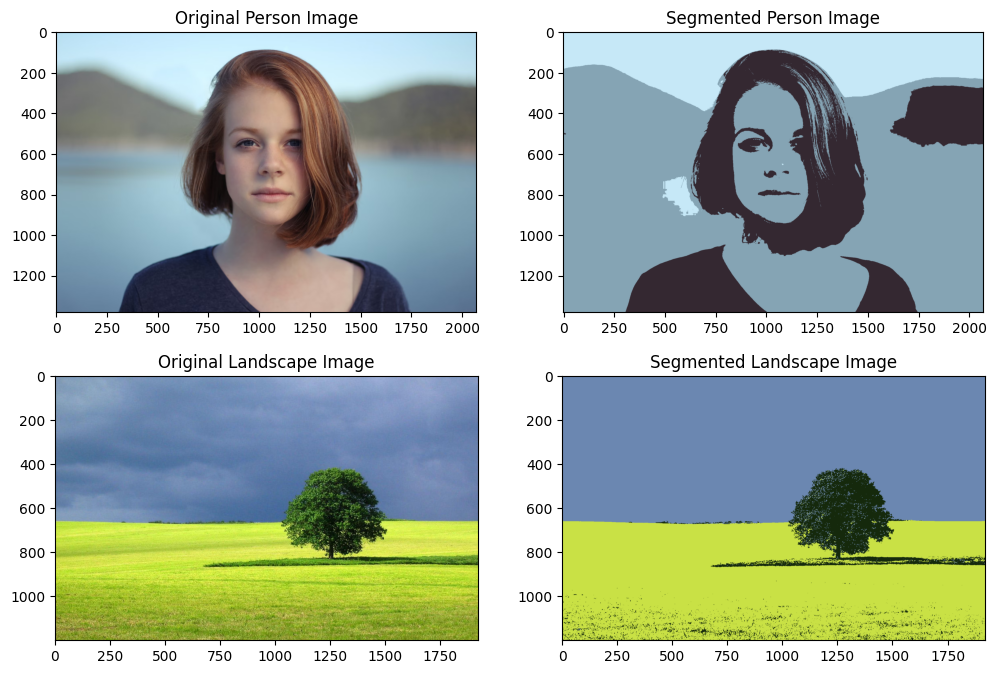

In [ ]:
from sklearn.cluster import MeanShift, estimate_bandwidth

def segmentedImageMeanShift(imageRGB):

  X = np.reshape(imageRGB, (-1, 3))

  # The following bandwidth can be automatically detected using
  bandwidth = estimate_bandwidth(X, quantile=0.2, n_samples=500)

  #Form clusters
  ms = MeanShift(bandwidth=bandwidth, bin_seeding=True)
  ms.fit(X)
  labels = ms.labels_
  cluster_centers = ms.cluster_centers_

  # Create a segmented image
  segmented_image = cluster_centers[labels].reshape(imageRGB.shape)

  return segmented_image

#segment the images using mean shift
segmented_person_image = segmentedImageMeanShift(image1_rgb)
segmented_landscape_image = segmentedImageMeanShift(image2_rgb)

# Display the original and segmented images
plt.figure(figsize=(12, 8))
plt.subplot(221)
plt.imshow(image1_rgb)
plt.title("Original Person Image")

plt.subplot(222)
plt.imshow(segmented_person_image.astype(np.uint8))
plt.title("Segmented Person Image")

plt.subplot(223)
plt.imshow(image2_rgb)
plt.title("Original Landscape Image")

plt.subplot(224)
plt.imshow(segmented_landscape_image.astype(np.uint8))
plt.title("Segmented Landscape Image")

plt.show()



# from sklearn.cluster import MeanShift, estimate_bandwidth

# def segmentedImageMeanShift(imageRGB):

#   X = np.reshape(imageRGB, (-1, 3))

#   # The following bandwidth can be automatically detected using
#   bandwidth = estimate_bandwidth(X, quantile=0.2, n_samples=500)

#   #Form clusters
#   ms = MeanShift(bandwidth=bandwidth, bin_seeding=True)
#   ms.fit(X)
#   labels = ms.labels_
#   # cluster_centers = ms.cluster_centers_
#   # Create a segmented image
#   # segmented_image = cluster_centers[labels].reshape(imageRGB.shape)

#   labels = ms.labels_

#   # Reshape the result to the original image shape
#   segmented_image = labels.reshape(imageRGB.shape[:2])

#   return segmented_image

# #segment the images using mean shift
# segmented_person_image = segmentedImageMeanShift(image1_rgb)
# segmented_landscape_image = segmentedImageMeanShift(image2_rgb)

# # Display the original and segmented images
# plt.figure(figsize=(12, 8))
# plt.subplot(221)
# plt.imshow(image1_rgb)
# plt.title("Original Person Image")

# plt.subplot(222)
# plt.imshow(segmented_person_image.astype(np.uint8))
# plt.title("Segmented Person Image")

# plt.subplot(223)
# plt.imshow(image2_rgb)
# plt.title("Original Landscape Image")

# plt.subplot(224)
# plt.imshow(segmented_landscape_image.astype(np.uint8))
# plt.title("Segmented Landscape Image")

# plt.show()

### 1.4 Discuss the benefits and limitations of these clustering methods for image segmentation.

## 2. Neural Network Implementation for Image Segmentation

### 2.1 Implement the pre-trained Mask R-CNN model and run it on the street.png image included in the assignment folder.

In [13]:
from gluoncv import model_zoo, data, utils

net = model_zoo.get_model('mask_rcnn_resnet50_v1b_coco', pretrained=True)

100%|██████████| 131497/131497 [00:03<00:00, 37447.58KB/s]


In [14]:

import time

# Record the start time
start_time = time.time()


im_fname = utils.download('https://github.com/dmlc/web-data/blob/master/' +
                          'gluoncv/detection/biking.jpg?raw=true',
                          path=img3Path)
x, orig_img = data.transforms.presets.rcnn.load_test(im_fname)

scores_list = []

times_list = []

ids, scores, bboxes, masks = [xx[0].asnumpy() for xx in net(x)]

# Record the end time
end_time = time.time()

# Calculate the elapsed time
elapsed_time = end_time - start_time

scores_list.append(scores)

times_list.append(elapsed_time)

# paint segmentation mask on images directly
width, height = orig_img.shape[1], orig_img.shape[0]
masks, _ = utils.viz.expand_mask(masks, bboxes, (width, height), scores)
orig_img = utils.viz.plot_mask(orig_img, masks)



### 2.2 Display the result that shows the bounding boxes, object classes, and segmentations inside each bounding box.

In [15]:
# identical to Faster RCNN object detection
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(1, 1, 1)
ax = utils.viz.plot_bbox(orig_img, bboxes, scores, ids,
                         class_names=net.classes, ax=ax)
plt.show()

### 2.3 Repeat steps 1 and 2 for an image of a Montreal street scene that you took with your own camera. You can use the image that you acquired for Assignment 4.

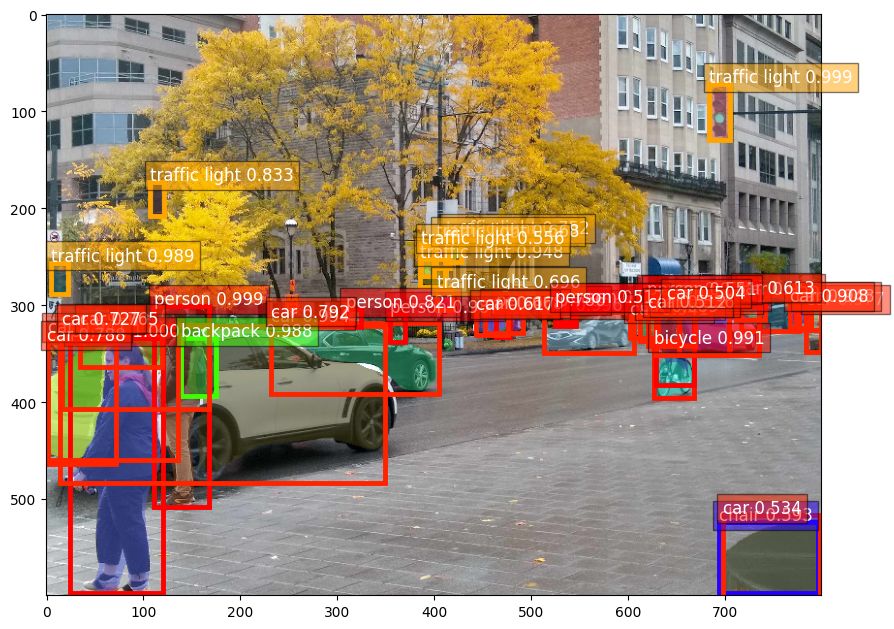

In [16]:
# Record the start time
start_time = time.time()


im_fname = utils.download('https://github.com/dmlc/web-data/blob/master/' +
                          'gluoncv/detection/biking.jpg?raw=true',
                          path=img4Path)
x, orig_img = data.transforms.presets.rcnn.load_test(im_fname)

ids, scores, bboxes, masks = [xx[0].asnumpy() for xx in net(x)]

# Record the end time
end_time = time.time()

# Calculate the elapsed time
elapsed_time = end_time - start_time


scores_list.append(scores)
times_list.append(elapsed_time)


# paint segmentation mask on images directly
width, height = orig_img.shape[1], orig_img.shape[0]
masks, _ = utils.viz.expand_mask(masks, bboxes, (width, height), scores)
orig_img = utils.viz.plot_mask(orig_img, masks)

# identical to Faster RCNN object detection
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(1, 1, 1)
ax = utils.viz.plot_bbox(orig_img, bboxes, scores, ids,
                         class_names=net.classes, ax=ax)
plt.show()

### 2.4 Evaluate the performance of this model and explain the steps that this network took to achieve the final result.

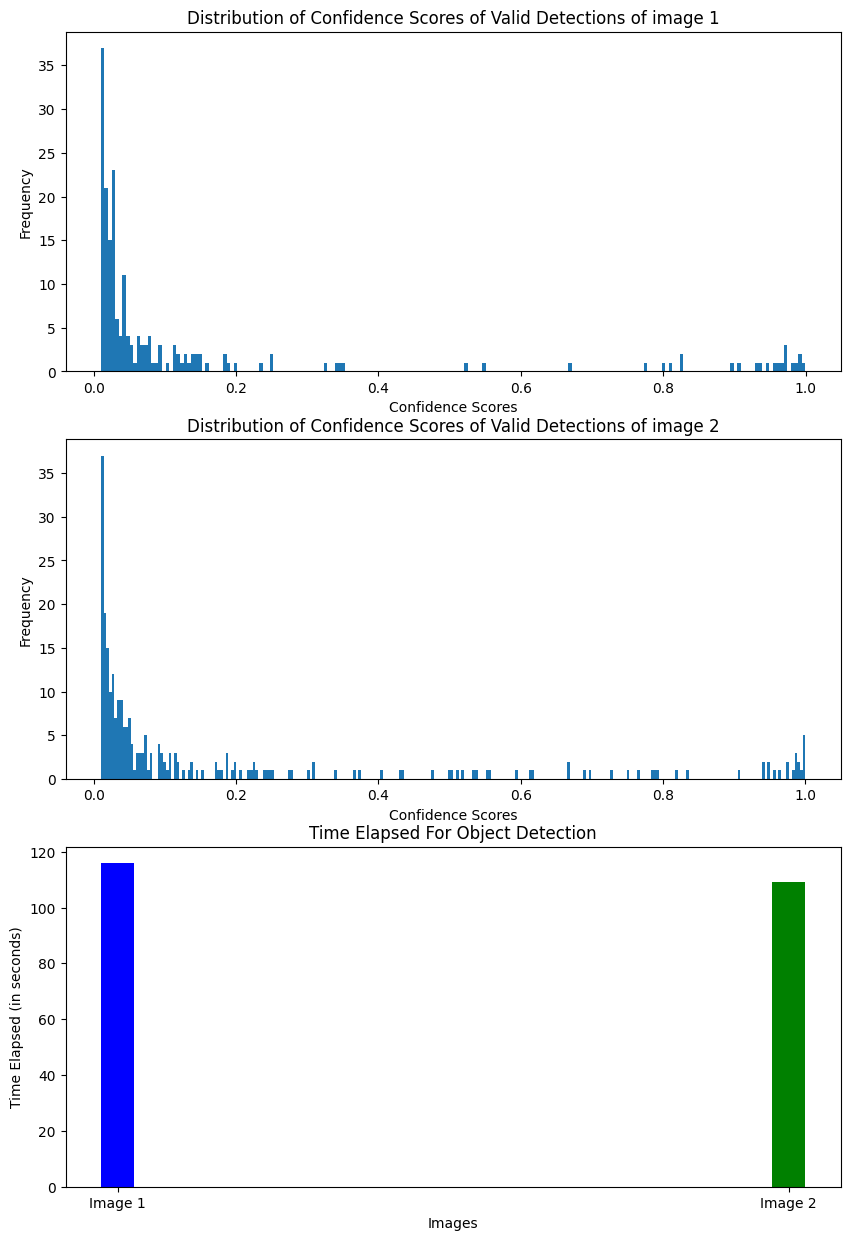

In [17]:

plt.figure(figsize=(10, 15))

i = 0

for scores in scores_list:

  scores_modified = scores_list[i].flatten()
  scores_modified = scores_modified[scores_modified >=0]

  i = i + 1

  # Get unique scores and their counts
  unique_scores, counts = np.unique(scores_modified, return_counts=True)
  num_bins = len(unique_scores)

  plt.subplot(3,1,i)
  # Plotting histogram of confidence scores
  plt.hist(scores_modified, bins=num_bins)
  plt.xlabel('Confidence Scores')
  plt.ylabel('Frequency')
  plt.title(f'Distribution of Confidence Scores of Valid Detections of image {i}')


plt.subplot(3,1,3)

# Create a bar plot
plt.bar(np.array(['Image 1','Image 2']), times_list, color=['blue', 'green'], width = 0.05)
# Set labels and title
plt.xlabel('Images')
plt.ylabel('Time Elapsed (in seconds)')
plt.title('Time Elapsed For Object Detection')
plt.show()

By analyzing the confidence values of valid detections, its clear that it does not show promise. Although the performance in terms of confidence values and time efficiency were displayed using a pre-trained model, it does not entirely illustrate the performance of the model. To do so, we would need to further explore and have testing image datasets and the expected objects to be observed in order to evaluate its performance. However, visually speaking, it seems to have detect a fair number of objects correctly.

Mask R-CNN used in this code combines object detection and instance segmentation. Regarding the steps that this network, by reading their documentation on their website, they first proceed with the image acquisition (so getting and processing the image as input). Then, they apply on their pre-trained convolutional neural network  for feature extraction. The model uses Feature Pyramid Network (FPN) to construct a multi-scale feature pyramid, capturing contextual information across different scales of the image, enabling better object detection and segmentation across a wide range of object sizes. Once that is done, software uses Region Proposal Network (RPN) to generate potential object regions (proposals) based on the extracted features. These proposed regions undergo certain transformations such as cropping and resizing using ROIAlign to address dimension issues with the traditional ROI pooling. As a result, it generates more accurate segmentation masks, especially for small objects. To perform those segmentation masks, they use a component that they call Mask Head which uses the aligned features outputted from ROIAlign layer to predict a binary mask for each object. Once those regions are processed, the model predicts each of them through object class probabilities and refines bounding box coordinates.
